# Comparing the Old and the New.

In [1]:
# Import Library 

import re
import requests
import unicodedata
from bs4 import BeautifulSoup
from pprint import pprint
import numpy as np
from numpy import array
import pandas as pd 
import csv
import pickle
from IPython.display import display
import pickle
from collections import Counter
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision',20)
from IPython.core import display as ICD


# Loading

In [2]:
QorK = {'10-Q': ['0000037996-20-000041',
  '0000037996-19-000078',
  '0000037996-19-000067',
  '0000037996-19-000026',
  '0000037996-18-000084',
  '0000037996-18-000063',
  '0000037996-18-000036',
  '0000037996-17-000092',
  '0000037996-17-000068',
  '0000037996-17-000036',
  '0000037996-16-000158',
  '0000037996-16-000133',
  '0000037996-16-000107',
  '0000037996-15-000064',
  '0000037996-15-000046',
  '0000037996-15-000029',
  '0000037996-14-000057',
  '0000037996-14-000043',
  '0000037996-14-000023',
  '0000037996-13-000055',
  '0000037996-13-000042',
  '0000037996-13-000027'],
 '10-K': ['0000037996-20-000010',
  '0000037996-19-000012',
  '0000037996-18-000015',
  '0000037996-17-000013',
  '0000037996-16-000092',
  '0000037996-15-000013',
  '0000037996-14-000010',
  '0000037996-13-000014']}

In [3]:
df = pd.read_pickle( "0000037996-20-000041-10-Q.csv")        
ICD.display(df)

,Quarter,Year,ASSETS,Cash,Marketable securities,Ford Credit finance receivables,Trade and other receivables,Inventory,Assets held for sale,Other assets,Total current assets,NaN,Ford Credit finance receivables,Net investment in operating leases,Property and Equipment,Equity in assets of affiliated companies,Deferred income taxes,Other assets,Total assets,NaN,LIABILITIES,Payables,Deferred Revenue,Automotive debt payable within one year,Ford Credit debt payable within one year,Other debt payable within one year,Liabilities held for sale,Total current liabilities,NaN,Deferred Revenue,Automotive long term debt,Ford Credit long term debt,Other long term debt,Deferred income taxes,Total liabilities,NaN,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,NaN,NaN,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,NaN,ASSETS,Cash,Ford Credit finance receivables,Net investment in operating leases,Other assets,LIABILITIES,Deferred Revenue,Debt
1,Q1,2020,None,25971000000,20399000000,54889000000,6625000000,11312000000,700000000,4380000000,124276000000,None,51141000000,28514000000,35294000000,2275000000,10922000000,11728000000,264150000000,None,None,18439000000,22674000000,1609000000,51303000000,None,469000000,94494000000,None,25105000000,28411000000,85533000000,470000000,439000000,234452000000,None,None,40000000,1000000,22150000000,17527000000,8461000000,1607000000,29650000000,48000000,29698000000,264150000000,None,None,None,31000000,None,None,2549000000,54038000000,14410000000,1000000,None,110000000,48379000000


In [4]:
def duplicate_columns( DataF ):
    
    try: 
        DataF.drop(DataF[None], axis =1, inplace=True)
        
    except:
        pass 
    
    new_col = list(DataF.columns)
    
    clean_col = [str(column).strip() for column in new_col ]

    DataF.set_axis(clean_col, axis=1, inplace=True)
    
    duplicates = [col_name for (col_name,freq) in Counter(DataF.columns).items() if freq > 1] 
    print('{} duplicates '.format(len(duplicates)), duplicates, '\n')
    
    for dupli in duplicates: 
#         print(type(DataF[dupli].values))            
        
        try:
            res = DataF[dupli].fillna(0).values.sum()
            DataF['Total {}'.format(dupli)] = res
            DataF.drop(columns =dupli, axis=1, inplace=True)

        except: 
            DataF.drop(columns =dupli, axis=1, inplace=True)

        #DataF.drop(dupli, axis=1, inplace=True)
        
    return DataF

In [5]:
df_list =[]
for k, v in QorK.items():
            
    for i, vv in enumerate(v):
        print(vv, k)
                
        dfs = pd.read_pickle( "{}-{}.csv".format(v[i], k))
        #dfm = dfs[0]
        
        #dfm.drop([2], inplace=True)
        
        # Add unique identity to row 
        dfs['Filing/Acc.No.'] = '{}, {}'.format(k, vv)
        print('original shape:', dfs.shape)
        
        final_df = duplicate_columns(dfs)
        ICD.display(final_df)
        # handle duplicate column name
        df_list.append( final_df )
        
        #print(df_list[0].shape)
        
#ICD.display(abt)

0000037996-20-000041 10-Q
original shape: (1, 61)
8 duplicates  ['ASSETS', 'Cash', 'Ford Credit finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Assets held for sale,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Ford Credit debt payable within one year,Other debt payable within one year,Liabilities held for sale,Total current liabilities,Automotive long term debt,Ford Credit long term debt,Other long term debt,Total liabilities,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Ford Credit finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q1,2020,20399000000,6625000000,11312000000,700000000,124276000000,35294000000,2275000000,264150000000,18439000000,1609000000,51303000000,None,469000000,94494000000,28411000000,85533000000,470000000,234452000000,None,40000000,1000000,22150000000,17527000000,8461000000,1607000000,29650000000,48000000,29698000000,264150000000,None,31000000,48379000000,"10-Q, 0000037996-20-000041",0,28520000000,160068000000,16109000000,42924000000,11361000000,0,47889000000


0000037996-19-000078 10-Q
original shape: (1, 63)
8 duplicates  ['ASSETS', 'Cash', 'Ford Credit finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Assets of held for sale operations,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Ford Credit debt payable within one year,Other debt payable within one year,Liabilities of held for sale operations,Total current liabilities,Automotive long term debt,Ford Credit long term debt,Other long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Ford Credit finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q3,2019,16808000000,10621000000,12451000000,None,115754000000,35404000000,2623000000,258157000000,22228000000,1622000000,52852000000,None,None,99087000000,12615000000,86422000000,470000000,222770000000,None,None,40000000,1000000,22179000000,22590000000,7842000000,1619000000,35349000000,38000000,35387000000,258157000000,None,30000000,50981000000,"10-Q, 0000037996-19-000078",0,23183000000,161259000000,14079000000,42123000000,11124000000,0,45509000000


0000037996-19-000067 10-Q
original shape: (1, 60)
8 duplicates  ['ASSETS', 'Cash', 'Ford Credit finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Ford Credit debt payable within one year,Other debt payable within one year,Total current liabilities,Automotive long term debt,Ford Credit long term debt,Other long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Ford Credit finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q2,2019,15931000000,10941000000,12437000000,118351000000,36581000000,2637000000,262184000000,22980000000,2229000000,50492000000,None,98334000000,11765000000,90978000000,470000000,226048000000,None,None,40000000,1000000,22111000000,22769000000,7436000000,1388000000,36097000000,39000000,36136000000,262184000000,None,30000000,51791000000,"10-Q, 0000037996-19-000067",0,25836000000,165749000000,13966000000,43784000000,10622000000,0,46597000000


0000037996-19-000026 10-Q
original shape: (1, 59)
8 duplicates  ['ASSETS', 'Cash', 'Ford Credit finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Ford Credit debt payable within one year,Other debt payable within one year,Total current liabilities,Automotive long term debt,Ford Credit long term debt,Other long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Ford Credit finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q1,2019,16882000000,12016000000,12333000000,121195000000,36145000000,2605000000,263281000000,23325000000,2523000000,51895000000,None,99237000000,11087000000,91055000000,470000000,226712000000,135000000,None,40000000,1000000,22026000000,23226000000,7501000000,1394000000,36398000000,36000000,36434000000,263281000000,None,31000000,52248000000,"10-Q, 0000037996-19-000026",0,23838000000,170521000000,13145000000,45242000000,10963000000,0,45625000000


0000037996-18-000084 10-Q
original shape: (1, 60)
8 duplicates  ['ASSETS', 'Cash', 'Ford Credit finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Ford Credit debt payable within one year,Total current liabilities,Automotive long term debt,Ford Credit long term debt,Other long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Ford Credit finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q3,2018,17780000000,11244000000,12810000000,114843000000,35762000000,2858000000,258966000000,23273000000,3216000000,47547000000,94750000000,11448000000,90620000000,600000000,222248000000,99000000,None,40000000,1000000,22011000000,23384000000,7429000000,1417000000,36590000000,29000000,36619000000,258966000000,None,30000000,50564000000,"10-Q, 0000037996-18-000084",0,21308000000,164273000000,12051000000,41981000000,11155000000,0,44944000000


0000037996-18-000063 10-Q
original shape: (1, 60)
8 duplicates  ['ASSETS', 'Cash', 'Ford Credit finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Ford Credit debt payable within one year,Total current liabilities,Automotive long term debt,Ford Credit long term debt,Other long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Ford Credit finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q2,2018,19648000000,11026000000,12565000000,115025000000,35580000000,3087000000,258079000000,22743000000,3968000000,46916000000,94861000000,11642000000,89718000000,599000000,221511000000,99000000,None,40000000,1000000,21953000000,22993000000,7204000000,1342000000,36441000000,28000000,36469000000,258079000000,None,30000000,50012000000,"10-Q, 0000037996-18-000063",0,19907000000,163305000000,11959000000,41572000000,10955000000,0,45347000000


0000037996-18-000036 10-Q
original shape: (1, 60)
8 duplicates  ['ASSETS', 'Cash', 'Ford Credit finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Ford Credit debt payable within one year,Total current liabilities,Automotive long term debt,Ford Credit long term debt,Other long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Ford Credit finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q1,2018,22131000000,12386000000,12371000000,123264000000,36118000000,3213000000,267230000000,25480000000,3751000000,49232000000,99878000000,12071000000,92681000000,599000000,230696000000,98000000,None,40000000,1000000,21841000000,22529000000,6669000000,1342000000,36400000000,36000000,36436000000,267230000000,None,31000000,50366000000,"10-Q, 0000037996-18-000036",0,20806000000,170946000000,12365000000,40315000000,11259000000,0,46265000000


0000037996-17-000092 10-Q
original shape: (1, 59)
8 duplicates  ['ASSETS', 'Cash', 'Financial Services finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Financial Services debt payable within one year,Total current liabilities,Automotive long term debt,Financial Services long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Financial Services finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q3,2017,20492000000,10277000000,11263000000,112732000000,34760000000,3344000000,251273000000,23566000000,3551000000,47623000000,94352000000,12633000000,85305000000,217913000000,97000000,None,40000000,1000000,21804000000,19405000000,6759000000,1253000000,33238000000,25000000,33263000000,251273000000,None,30000000,43302000000,"10-Q, 0000037996-17-000092",0,20100000000,156698000000,10671000000,38622000000,11163000000,0,44433000000


0000037996-17-000068 10-Q
original shape: (1, 59)
8 duplicates  ['ASSETS', 'Cash', 'Financial Services finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Financial Services debt payable within one year,Total current liabilities,Automotive long term debt,Financial Services long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Financial Services finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q2,2017,22886000000,10159000000,11092000000,113539000000,33794000000,3241000000,247469000000,23568000000,2911000000,47862000000,94299000000,13277000000,81959000000,215110000000,97000000,None,40000000,1000000,21735000000,18437000000,6716000000,1253000000,32244000000,18000000,32262000000,247469000000,None,30000000,43051000000,"10-Q, 0000037996-17-000068",0,18831000000,154798000000,9932000000,39600000000,10880000000,0,44800000000


0000037996-17-000036 10-Q
original shape: (1, 59)
8 duplicates  ['ASSETS', 'Cash', 'Financial Services finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Financial Services debt payable within one year,Total current liabilities,Automotive long term debt,Financial Services long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Financial Services finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q1,2017,22166000000,10685000000,10535000000,113228000000,32668000000,3642000000,244094000000,23257000000,3100000000,46157000000,91304000000,13110000000,83610000000,213356000000,97000000,None,40000000,1000000,21637000000,16992000000,6929000000,1122000000,30619000000,22000000,30641000000,244094000000,None,31000000,42960000000,"10-Q, 0000037996-17-000036",0,20468000000,152159000000,9336000000,40239000000,10804000000,0,43377000000


0000037996-16-000158 10-Q
original shape: (1, 59)
8 duplicates  ['ASSETS', 'Cash', 'Financial Services finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Financial Services debt payable within one year,Total current liabilities,Automotive long term debt,Financial Services long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,30000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Financial Services finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
0,Q3,2016,20825000000,10029000000,10219000000,103515000000,32257000000,3795000000,234963000000,22384000000,2472000000,44801000000,89188000000,10675000000,79276000000,203368000000,96000000,None,40000000,1000000,21598000000,17013000000,6046000000,1122000000,31484000000,15000000,31499000000,234963000000,None,2016000000,39123000000,"10-Q, 0000037996-16-000158",0,15658000000,142791000000,10670000000,39147000000,10052000000,0,43193000000


0000037996-16-000133 10-Q
original shape: (1, 59)
8 duplicates  ['ASSETS', 'Cash', 'Financial Services finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Financial Services debt payable within one year,Total current liabilities,Automotive long term debt,Financial Services long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,The following table includes assets to be used to settle liabilities of the consolidated variable interest entities,30000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Financial Services finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
0,Q2,2016,22234000000,10728000000,9829000000,110767000000,31940000000,3349000000,239678000000,23084000000,2417000000,42444000000,89408000000,10654000000,84399000000,208429000000,95000000,None,40000000,1000000,21546000000,16652000000,5976000000,1122000000,31141000000,13000000,31154000000,239678000000,None,2016000000,41515000000,"10-Q, 0000037996-16-000133",0,19481000000,145131000000,9960000000,41182000000,10374000000,0,44904000000


0000037996-16-000107 10-Q
original shape: (1, 50)
8 duplicates  ['ASSETS', 'Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Total assets,Payables,Automotive debt,Financial Services debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,Debt,Filing/Acc.No.,Total ASSETS,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Deferred Revenue
0,Q1,2016,23556000000,11252000000,9770000000,3820000000,31164000000,237288000000,22072000000,13022000000,127973000000,207572000000,95000000,None,None,40000000,1000000,21454000000,15278000000,6046000000,1122000000,29605000000,16000000,29621000000,237288000000,2016000000,43258000000,"10-Q, 0000037996-16-000107",0,18519000000,144315000000,41507000000,11135000000,8767000000,0,43975000000


0000037996-15-000064 10-Q
original shape: (1, 49)
9 duplicates  ['ASSETS', 'Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Deferred Revenue', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,30000000,Filing/Acc.No.,Total ASSETS,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Deferred Revenue,Total Debt
0,Q3,2015,17161000000,13373000000,9496000000,3505000000,30137000000,219431000000,22386000000,191853000000,94000000,None,None,40000000,1000000,21354000000,27489000000,20442000000,977000000,27465000000,19000000,27484000000,219431000000,2015000000,"10-Q, 0000037996-15-000064",0,17129000000,129244000000,38173000000,11963000000,7588000000,0,42543000000,168137000000


0000037996-15-000046 10-Q
original shape: (1, 49)
9 duplicates  ['ASSETS', 'Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Deferred Revenue', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,30000000,Filing/Acc.No.,Total ASSETS,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Deferred Revenue,Total Debt
0,Q2,2015,18405000000,12666000000,9438000000,3469000000,30750000000,216045000000,21844000000,189597000000,93000000,None,None,40000000,1000000,21317000000,26175000000,20260000000,939000000,26334000000,21000000,26355000000,216045000000,2015000000,"10-Q, 0000037996-15-000046",0,15252000000,126384000000,38026000000,13075000000,7009000000,0,43679000000,164121000000


0000037996-15-000029 10-Q
original shape: (1, 49)
9 duplicates  ['ASSETS', 'Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Deferred Revenue', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,Filing/Acc.No.,Total ASSETS,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Deferred Revenue,Total Debt
0,Q1,2015,20732000000,13005000000,9519000000,3628000000,29612000000,212374000000,22366000000,187311000000,89000000,None,None,40000000,1000000,21273000000,24887000000,20406000000,848000000,24947000000,27000000,24974000000,212374000000,2015000000,"10-Q, 0000037996-15-000029",0,14700000000,120131000000,34029000000,13464000000,7558000000,0,41682000000,162185000000


0000037996-14-000057 10-Q
original shape: (1, 49)
9 duplicates  ['ASSETS', 'Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Deferred Revenue', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,30000000,Filing/Acc.No.,Total ASSETS,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Deferred Revenue,Total Debt
0,Q3,2014,20643000000,11143000000,9296000000,3103000000,30048000000,208835000000,21155000000,182331000000,339000000,None,None,39000000,1000000,21680000000,25051000000,18165000000,2470000000,26136000000,29000000,26165000000,208835000000,2014000000,"10-Q, 0000037996-14-000057",0,15342000000,117472000000,32937000000,12888000000,6091000000,0,41425000000,155062000000


0000037996-14-000043 10-Q
original shape: (1, 49)
9 duplicates  ['ASSETS', 'Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Deferred Revenue', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,30000000,Filing/Acc.No.,Total ASSETS,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Deferred Revenue,Total Debt
0,Q2,2014,24096000000,12853000000,9365000000,3356000000,29294000000,210945000000,22062000000,183801000000,337000000,None,None,39000000,1000000,21605000000,24699000000,18107000000,1461000000,26776000000,31000000,26807000000,210945000000,2014000000,"10-Q, 0000037996-14-000043",0,13759000000,123111000000,31081000000,13184000000,5720000000,0,42484000000,157029000000


0000037996-14-000023 10-Q
original shape: (1, 49)
9 duplicates  ['ASSETS', 'Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Deferred Revenue', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,Filing/Acc.No.,Total ASSETS,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Deferred Revenue,Total Debt
0,Q1,2014,23546000000,12088000000,8874000000,3982000000,28447000000,207082000000,22209000000,179944000000,331000000,None,None,39000000,1000000,21547000000,23882000000,18190000000,506000000,26773000000,34000000,26807000000,207082000000,2014000000,"10-Q, 0000037996-14-000023",0,15751000000,122216000000,29616000000,13724000000,6232000000,0,40214000000,155987000000


0000037996-13-000055 10-Q
original shape: (1, 51)
9 duplicates  ['ASSETS', 'Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Accrued Liabilities', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Net intangible assets,Assets held for sale,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,30000000,Filing/Acc.No.,Total ASSETS,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Accrued Liabilities,Total Debt
0,Q3,2013,22890000000,11693000000,8799000000,3466000000,26836000000,86000000,98000000,201071000000,21640000000,180232000000,329000000,None,None,39000000,1000000,21378000000,21014000000,21509000000,456000000,20467000000,43000000,20510000000,201071000000,2013000000,"10-Q, 0000037996-13-000055",0,17457000000,116524000000,27922000000,13660000000,5055000000,0,47409000000,149159000000


0000037996-13-000042 10-Q
original shape: (1, 51)
9 duplicates  ['ASSETS', 'Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Accrued Liabilities', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Net intangible assets,Assets held for sale,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,30000000,Filing/Acc.No.,Total ASSETS,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Accrued Liabilities,Total Debt
0,Q2,2013,23344000000,11353000000,8192000000,3223000000,25863000000,82000000,264000000,196210000000,20961000000,176661000000,327000000,None,None,39000000,1000000,21219000000,20136000000,21837000000,379000000,19179000000,43000000,19222000000,196210000000,2013000000,"10-Q, 0000037996-13-000042",0,16200000000,116866000000,26133000000,14370000000,5014000000,0,47207000000,147283000000


0000037996-13-000027 10-Q
original shape: (1, 51)
9 duplicates  ['ASSETS', 'Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Accrued Liabilities', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Net intangible assets,Assets held for sale,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,Filing/Acc.No.,Total ASSETS,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Accrued Liabilities,Total Debt
0,Q1,2013,20521000000,11384000000,8423000000,3291000000,25795000000,84000000,571000000,193010000000,20600000000,175048000000,324000000,None,None,39000000,1000000,21094000000,19296000000,22533000000,302000000,17595000000,43000000,17638000000,193010000000,2013000000,"10-Q, 0000037996-13-000027",0,16797000000,119249000000,23822000000,15117000000,5601000000,0,46514000000,147883000000


0000037996-20-000010 10-K
original shape: (1, 60)
7 duplicates  ['Cash', 'Ford Credit finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Assets held for sale,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Ford Credit debt payable within one year,Other debt payable within one year,Liabilities held for sale,Total current liabilities,Automotive long term debt,Ford Credit long term debt,Other long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,ASSETS,Debt,Filing/Acc.No.,Total Cash,Total Ford Credit finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q4,2019,17147000000,9237000000,10786000000,None,114047000000,36469000000,2519000000,258537000000,20673000000,1445000000,52371000000,None,None,98132000000,13233000000,87658000000,470000000,225307000000,None,None,40000000,1000000,22165000000,20320000000,7728000000,1613000000,33185000000,45000000,33230000000,258537000000,31000000,None,50865000000,"10-K, 0000037996-20-000010",20706000000,165832000000,14057000000,44113000000,12353000000,0,48330000000


0000037996-19-000012 10-K
original shape: (1, 57)
7 duplicates  ['Cash', 'Ford Credit finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Ford Credit debt payable within one year,Total current liabilities,Automotive long term debt,Ford Credit long term debt,Other long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,ASSETS,Debt,Filing/Acc.No.,Total Cash,Total Ford Credit finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q4,2018,17233000000,11195000000,11220000000,114649000000,36178000000,2709000000,256540000000,21520000000,2314000000,51179000000,95569000000,11233000000,88887000000,600000000,220474000000,100000000,None,40000000,1000000,22006000000,22668000000,7366000000,1417000000,35932000000,34000000,35966000000,256540000000,31000000,None,53269000000,"10-K, 0000037996-19-000012",19446000000,168559000000,11886000000,45451000000,11009000000,0,44168000000


0000037996-18-000015 10-K
original shape: (1, 56)
7 duplicates  ['Cash', 'Financial Services finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Financial Services debt payable within one year,Total current liabilities,Automotive long term debt,Financial Services long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,ASSETS,Debt,Filing/Acc.No.,Total Cash,Total Financial Services finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q4,2017,20435000000,10599000000,10277000000,115902000000,35327000000,3085000000,257808000000,23282000000,3356000000,48265000000,94600000000,12575000000,90091000000,222792000000,98000000,None,40000000,1000000,21843000000,21218000000,6959000000,1253000000,34890000000,28000000,34918000000,257808000000,31000000,None,46437000000,"10-K, 0000037996-18-000015",21971000000,164642000000,12057000000,39738000000,11788000000,0,44410000000


0000037996-17-000013 10-K
original shape: (1, 57)
7 duplicates  ['Cash', 'Financial Services finance receivables', 'Other assets', 'Net investment in operating leases', 'Deferred income taxes', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Trade and other receivables,Inventory,Total current assets,Property and Equipment,Equity in assets of affiliated companies,Total assets,Payables,Automotive debt payable within one year,Financial Services debt payable within one year,Total current liabilities,Automotive long term debt,Financial Services long term debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,ASSETS,Debt,Filing/Acc.No.,Total Cash,Total Financial Services finance receivables,Total Other assets,Total Net investment in operating leases,Total Deferred income taxes,Total LIABILITIES,Total Deferred Revenue
1,Q4,2016,22922000000,11102000000,8898000000,108461000000,32072000000,3304000000,237951000000,21296000000,2685000000,46984000000,90281000000,13222000000,80079000000,208668000000,96000000,None,None,40000000,1000000,21630000000,15634000000,7013000000,1122000000,29170000000,17000000,29187000000,237951000000,31000000,None,43730000000,"10-K, 0000037996-17-000013",18952000000,147047000000,9049000000,40590000000,10396000000,0,43716000000


0000037996-16-000092 10-K
original shape: (1, 48)
7 duplicates  ['Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Deferred Revenue'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Total assets,Payables,Automotive debt,Financial Services debt,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,ASSETS,Debt,Filing/Acc.No.,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Deferred Revenue
1,Q4,2015,20393000000,11708000000,7870000000,3357000000,30126000000,208615000000,20035000000,13824000000,105347000000,183808000000,342000000,None,None,39000000,1000000,21089000000,9422000000,5265000000,848000000,24438000000,27000000,24465000000,208615000000,31000000,None,37156000000,"10-K, 0000037996-16-000092",12851000000,120633000000,32848000000,14594000000,6079000000,0,44054000000


0000037996-15-000013 10-K
original shape: (1, 47)
8 duplicates  ['Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Deferred Revenue', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,ASSETS,Filing/Acc.No.,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Deferred Revenue,Total Debt
1,Q4,2014,22100000000,9828000000,7708000000,3679000000,27616000000,202179000000,19531000000,175703000000,331000000,None,None,39000000,1000000,21422000000,23386000000,18230000000,506000000,26112000000,33000000,26145000000,202179000000,31000000,None,"10-K, 0000037996-15-000013",18666000000,123277000000,28100000000,14066000000,5852000000,0,40974000000,155416000000


0000037996-14-000010 10-K
original shape: (1, 47)
8 duplicates  ['Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Deferred Revenue', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,ASSETS,Filing/Acc.No.,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Deferred Revenue,Total Debt
1,Q4,2013,20284000000,10878000000,7362000000,3246000000,24942000000,189406000000,19308000000,173095000000,322000000,None,None,39000000,1000000,20976000000,18077000000,22854000000,292000000,15947000000,42000000,15989000000,189406000000,31000000,None,"10-K, 0000037996-14-000010",18570000000,118506000000,21611000000,15655000000,5560000000,0,48393000000,145303000000


0000037996-13-000014 10-K
original shape: (1, 48)
8 duplicates  ['Cash', 'Finance receivables', 'Net investment in operating leases', 'Deferred income taxes', 'Other assets', 'LIABILITIES', 'Accrued Liabilities', 'Debt'] 



,Quarter,Year,Marketable securities,Other receivables,Inventory,Equity in assets of affiliated companies,Property and Equipment,Net intangible assets,Total assets,Payables,Total liabilities,Redeemable noncontrolling interest,EQUITY,Capital stock,Common Stock,Class B Stock,Capital in excess of par value of stock,Retained Earnings,Accumulated other comprehensive income/,Treasury stock,Total equity attributable to Ford Motor Company,Equity attributable to noncontrolling interests,Total equity,Total liabilities and equity,31000000,ASSETS,Filing/Acc.No.,Total Cash,Total Finance receivables,Total Net investment in operating leases,Total Deferred income taxes,Total Other assets,Total LIABILITIES,Total Accrued Liabilities,Total Debt
1,Q4,2012,18618000000,8565000000,5901000000,2936000000,22371000000,100000000,178348000000,17724000000,163277000000,None,None,None,37000000,1000000,20905000000,12985000000,18734000000,166000000,15028000000,43000000,15071000000,178348000000,31000000,None,"10-K, 0000037996-13-000014",20550000000,119771000000,19192000000,15821000000,4927000000,0,45466000000,140909000000


In [6]:
abt = pd.concat(df_list, sort=False)


In [7]:
abt.reset_index(drop=True, inplace=True)

## Exploring the ABT

In [8]:
# All column names are unique, the duplicate column function did its job.
original_col = list(abt.columns)
len(original_col) == len(set(original_col))

True

In [9]:
original_col

['Quarter',
 'Year',
 'Marketable securities',
 'Trade and other receivables',
 'Inventory',
 'Assets held for sale',
 'Total current assets',
 'Property and Equipment',
 'Equity in  assets of affiliated companies',
 'Total assets',
 'Payables',
 'Automotive debt payable within one year',
 'Ford Credit debt payable within one year',
 'Other debt payable within one year',
 'Liabilities held for sale',
 'Total current liabilities',
 'Automotive long term debt',
 'Ford Credit long term debt',
 'Other long term debt',
 'Total liabilities',
 'EQUITY',
 'Common Stock',
 'Class B Stock',
 'Capital in excess of par value of stock',
 'Retained Earnings',
 'Accumulated other comprehensive income/',
 'Treasury stock',
 'Total equity attributable to Ford Motor Company',
 'Equity attributable to noncontrolling interests',
 'Total equity',
 'Total liabilities and equity',
 'The following table includes assets to be used to settle liabilities of the consolidated variable interest entities',
 '3100000

In [10]:
payable_list =['Payables', 'Automotive debt payable within one year',
 'Ford Credit debt payable within one year',
 'Other debt payable within one year',  'Financial Services debt payable within one year']

In [11]:
abt[payable_list]

,Payables,Automotive debt payable within one year,Ford Credit debt payable within one year,Other debt payable within one year,Financial Services debt payable within one year
0,18439000000,1609000000,51303000000,None,NaN
1,22228000000,1622000000,52852000000,None,NaN
2,22980000000,2229000000,50492000000,None,NaN
3,23325000000,2523000000,51895000000,None,NaN
4,23273000000,3216000000,47547000000,NaN,NaN
5,22743000000,3968000000,46916000000,NaN,NaN
6,25480000000,3751000000,49232000000,NaN,NaN
7,23566000000,3551000000,NaN,NaN,47623000000
8,23568000000,2911000000,NaN,NaN,47862000000
9,23257000000,3100000000,NaN,NaN,46157000000


## Receivables

In [12]:
Receivable_list = ['Trade and other receivables', 'Total Ford Credit finance receivables', 'Total Financial Services finance receivables', 'Other receivables', 'Total Finance receivables']

In [13]:
abt[['Total Ford Credit finance receivables', 'Total Financial Services finance receivables', 'Total Finance receivables']]

,Total Ford Credit finance receivables,Total Financial Services finance receivables,Total Finance receivables
0,160068000000.0,NaN,NaN
1,161259000000.0,NaN,NaN
2,165749000000.0,NaN,NaN
3,170521000000.0,NaN,NaN
4,164273000000.0,NaN,NaN
5,163305000000.0,NaN,NaN
6,170946000000.0,NaN,NaN
7,NaN,156698000000.0,NaN
8,NaN,154798000000.0,NaN
9,NaN,152159000000.0,NaN


In [14]:
abt['Accounts Receivable'] = abt[['Total Ford Credit finance receivables', 'Total Financial Services finance receivables', 'Total Finance receivables']].sum(axis=1)
abt.drop(Receivable_list, axis=1, inplace=True)

## Deferred Revenue 

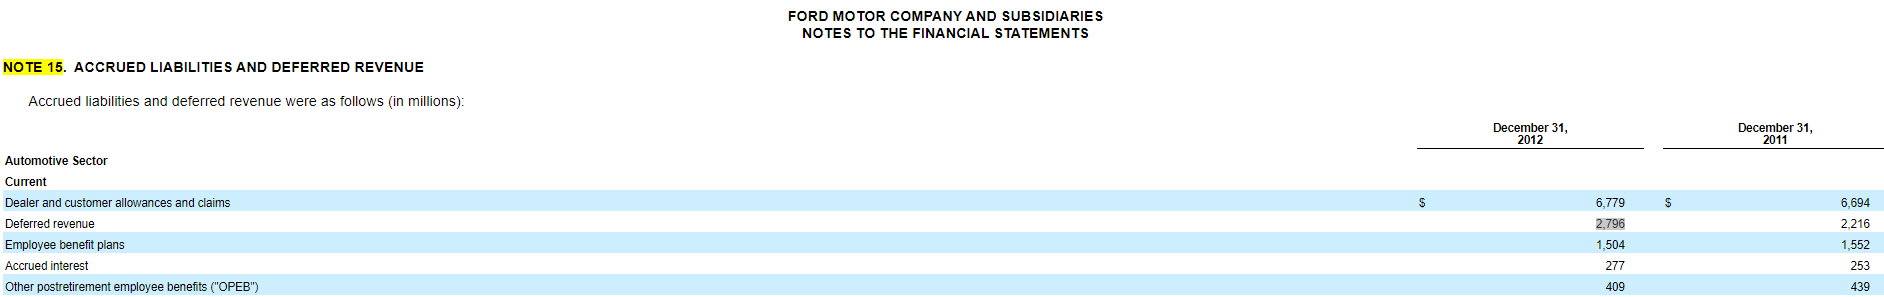

In [15]:
abt.loc[29, 'Total Deferred Revenue'] = 2796*(10**6)

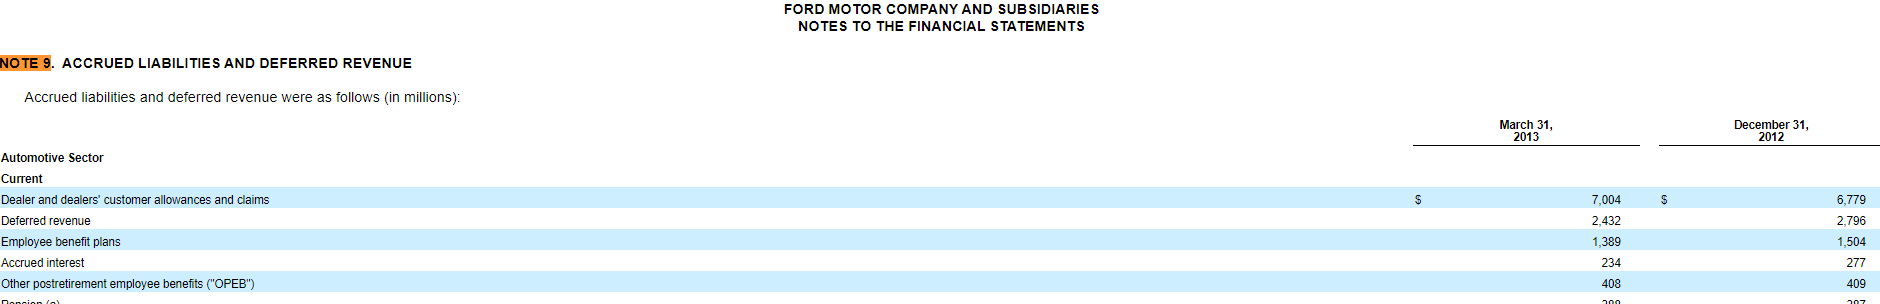

In [16]:
abt.loc[21, 'Total Deferred Revenue'] = 2432*(10**6)

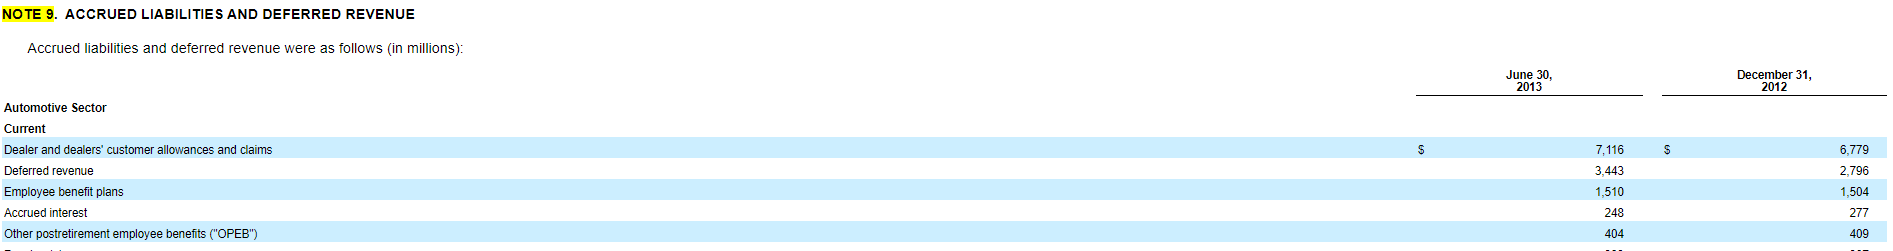

In [17]:
# 0000037996-13-000042
abt.loc[20, 'Total Deferred Revenue'] = 3443*(10**6)

In [18]:
abt.loc[:, ['Total Deferred Revenue', 'Filing/Acc.No.']]

,Total Deferred Revenue,Filing/Acc.No.
0,47889000000.0,"10-Q, 0000037996-20-000041"
1,45509000000.0,"10-Q, 0000037996-19-000078"
2,46597000000.0,"10-Q, 0000037996-19-000067"
3,45625000000.0,"10-Q, 0000037996-19-000026"
4,44944000000.0,"10-Q, 0000037996-18-000084"
5,45347000000.0,"10-Q, 0000037996-18-000063"
6,46265000000.0,"10-Q, 0000037996-18-000036"
7,44433000000.0,"10-Q, 0000037996-17-000092"
8,44800000000.0,"10-Q, 0000037996-17-000068"
9,43377000000.0,"10-Q, 0000037996-17-000036"


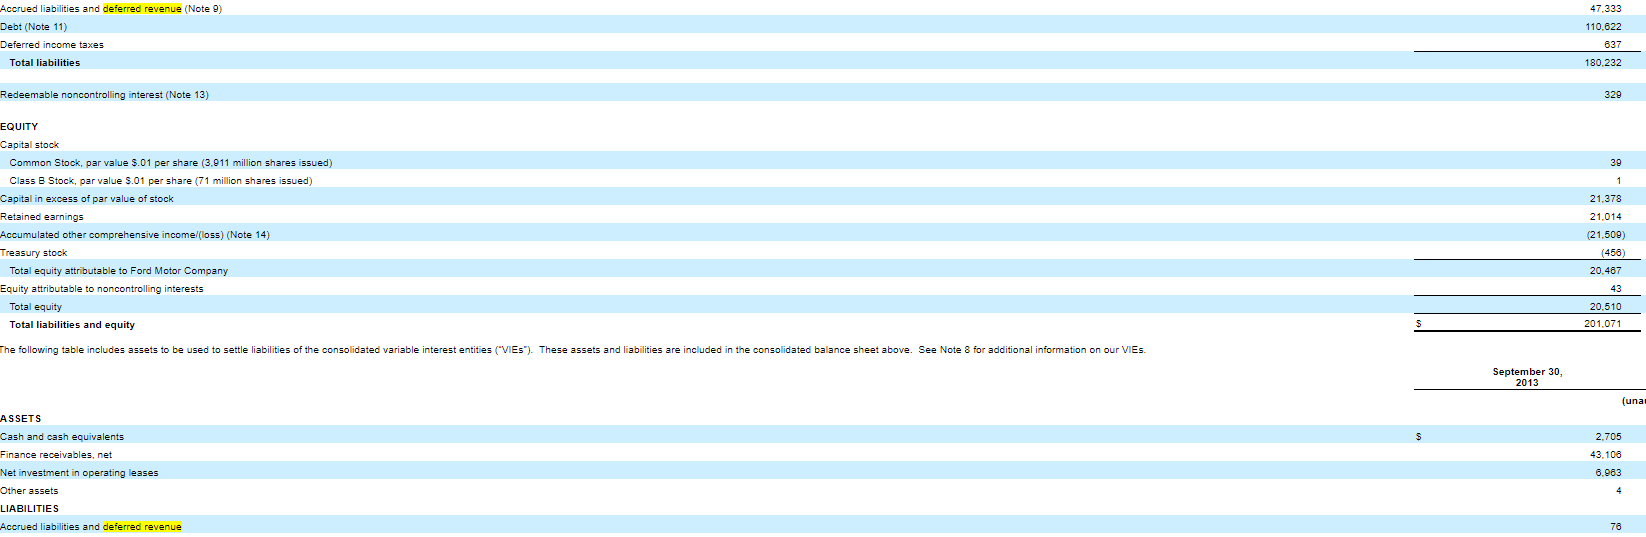

In [19]:
# 0000037996-13-000055
abt.loc[19, 'Total Deferred Revenue'] = (47333+76)*(10**6)

### After running the del_empty_col one-time we get a list of columns that will be deleted.

In [20]:
new_col = ['Quarter', 'Year', 'Marketable securities',
       'Trade and other receivables', 'Inventory', 'Total current assets',
       'Property and Equipment', 'Equity in  assets of affiliated companies',
       'Total assets', 'Payables', 'Automotive debt payable within one year',
       'Total current liabilities', 'Automotive long term debt',
       'Total liabilities', 'Common Stock', 'Class B Stock',
       'Capital in excess of par value of stock', 'Retained Earnings',
       'Accumulated other comprehensive income/', 'Treasury stock',
       'Total equity attributable to Ford Motor Company',
       'Equity attributable to noncontrolling interests', 'Total equity',
       'Total liabilities and equity', '31000000', 'Debt', 'Filing/Acc.No.',
       'Total Cash', 'Total Other assets',
       'Total Net investment in operating leases',
       'Total Deferred income taxes', 'Total Deferred Revenue',
       'Redeemable noncontrolling interest']

### But if left unattended, a lot of data will be unused. 

In [21]:
### Following was deleted using .isna().astype(int).mean() > 0.1
del_col = set(original_col) - set(new_col)
print(f'{len(del_col)} of {len(original_col)} columns was deleted.')
print(del_col)

26 of 59 columns was deleted.
{'EQUITY', 'Total Accrued Liabilities', 'ASSETS', 'Total Ford Credit finance receivables', 'Financial Services debt payable within one year', 'Ford Credit long term debt', 'Total Finance receivables', 'Total Financial Services finance receivables', 'Automotive debt', 'Financial Services long term debt', 'Other debt payable within one year', 'Total ASSETS', 'Financial Services debt', 'Total Debt', 'Capital stock', 'Ford Credit debt payable within one year', 'Net intangible assets', 'Other receivables', 'Total LIABILITIES', 'The following table includes assets to be used to settle liabilities of the consolidated variable interest entities', 'Liabilities held for sale', 'Other long term debt', 'Liabilities of held for sale operations', 'Assets held for sale', '30000000', 'Assets of held for sale operations'}


In [23]:
# What is the percentage of nulls in a given column.
count = 1
shares = []
for columns in abt:
    
    ratio = abt[columns].notna().astype(int).mean()
    if   ratio > 0.5:
        print(f' {count}.  "{columns}" ')
        print( ratio )
        print()
        count+=1
        shares.append(columns)
        
print('Length of Shares: ',len(shares) )
print( shares )

 1.  "Quarter" 
1.0

 2.  "Year" 
1.0

 3.  "Marketable securities" 
1.0

 4.  "Inventory" 
1.0

 5.  "Total current assets" 
0.5333333333333333

 6.  "Property and Equipment" 
1.0

 7.  "Equity in  assets of affiliated companies" 
1.0

 8.  "Total assets" 
1.0

 9.  "Payables" 
1.0

 10.  "Automotive debt payable within one year" 
0.5333333333333333

 11.  "Total current liabilities" 
0.5333333333333333

 12.  "Automotive long term debt" 
0.5333333333333333

 13.  "Total liabilities" 
1.0

 14.  "Common Stock" 
1.0

 15.  "Class B Stock" 
1.0

 16.  "Capital in excess of par value of stock" 
1.0

 17.  "Retained Earnings" 
1.0

 18.  "Accumulated other comprehensive income/" 
1.0

 19.  "Treasury stock" 
1.0

 20.  "Total equity attributable to Ford Motor Company" 
1.0

 21.  "Equity attributable to noncontrolling interests" 
1.0

 22.  "Total equity" 
1.0

 23.  "Total liabilities and equity" 
1.0

 24.  "31000000" 
0.7333333333333333

 25.  "Debt" 
0.6

 26.  "Filing/Acc.No." 
1.0



##  Deleting columns with null values above a certain threshold.

In [24]:
def del_empty_col( df ):
    
    for columns in df:
        
        df.replace(0, np.nan, inplace=True)
        
        if df[columns].notna().astype(int).mean() < 0.5:
            df.drop([columns], inplace=True, axis=1)
            
    df.fillna(0)
        
    return df

In [25]:
test_df = del_empty_col(abt).fillna(0)

In [26]:
# Just for checking.
def checking_duplicate_columns( DataF ):
    
    duplicates = [k for (k,v) in Counter(DataF.columns).items() if v > 1] 
    
    print('Shape of df: ', DataF.shape )
    return duplicates

In [27]:
checking_duplicate_columns(abt)

Shape of df:  (30, 33)


[]

In [28]:
abt.to_csv('abt-Ford.csv', index=False)

In [27]:
ford_col = list(abt.columns)
print(len(ford_col))

33


https://stackoverflow.com/questions/50950614/converting-column-into-multi-index-column

In [26]:
[entry for tag in tags for entry in entries if tag in entry]


NameError: name 'tags' is not defined

In [ ]:
common = [  name  for name in apple_col and ford_col ]
print(common[0])

In [ ]:
print(len(common))

In [ ]:
type(common[0])

In [ ]:
set_apple = set(apple_col)
print(set_apple)
set_ford = set(ford_col)
print(set_ford)

In [ ]:
print(set_ford & set_apple)